<a href="https://colab.research.google.com/github/MGHiremath028/Machine-Learning/blob/main/SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

This notebook will cover:
1. Loading and visualizing the dataset.
2. Preprocessing data.
3. Building an SVR model and understanding its parameters.
4. Hyperparameter tuning for optimal performance.
5. Evaluating and visualizing results.


# Importing required library

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


#Step 1: Load and Explore the Dataset

In [4]:
# Load the Boston Housing dataset from the original source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Create a pandas DataFrame
df = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
df['PRICE'] = target #add the target variable to the data frame

# Display first few rows
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Dataset Information
The Boston Housing dataset contains features about houses in Boston and their median values.
- **Features**: LSTAT, RM, DIS, etc.
- **Target**: PRICE, which is the median house price.


In [4]:
# Check for missing values and data types
df.info()


##Step 2: Data Visualization

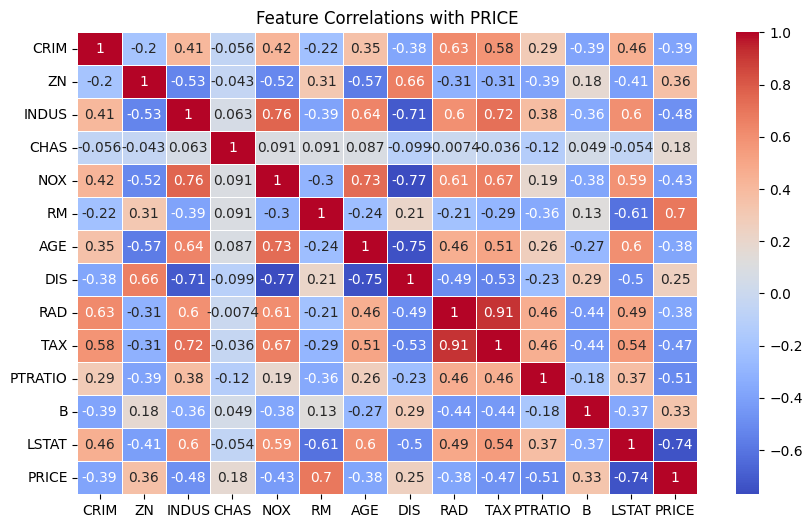

In [5]:
# Visualize correlations with the target
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlations with PRICE")
plt.show()


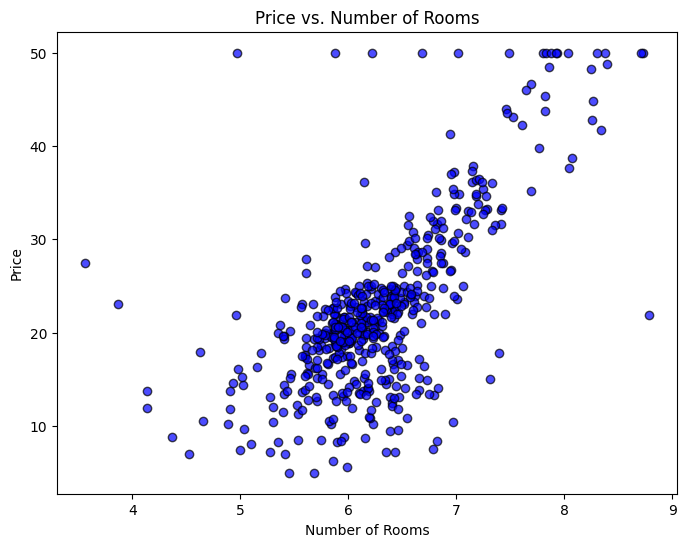

In [6]:
# Scatter plot of one of the most correlated features with PRICE
plt.figure(figsize=(8, 6))
plt.scatter(df['RM'], df['PRICE'], color='blue', edgecolor='k', alpha=0.7)
plt.title("Price vs. Number of Rooms")
plt.xlabel("Number of Rooms")
plt.ylabel("Price")
plt.show()


#Step 3: Preprocess Data

In [7]:
# Define features and target variable
X = df.drop('PRICE', axis=1)
y = df['PRICE']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for SVR)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#Step 4: Build and Train the SVR Model

### SVR Parameters
1. **kernel**: Type of kernel ('linear', 'poly', 'rbf', 'sigmoid'). Default is 'rbf'.
2. **C**: Regularization parameter. Higher values indicate higher penalty for errors.
3. **epsilon**: Specifies the epsilon-tube within which no penalty is associated in the training loss.
4. **gamma**: Defines how far the influence of a single training example reaches ('scale' or 'auto').


In [8]:
# Initialize SVR model
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the model
svr.fit(X_train, y_train)

# Make predictions
y_pred = svr.predict(X_test)


#Step 5: Hyperparameter Tuning with GridSearchCV

In [9]:
# Define parameter grid for SVR
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5, 1],
    'gamma': ['scale', 'auto']
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='r2', verbose=2)
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best R^2 Score:", grid_search.best_score_)



Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] END ....C=0.1, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....C=0.1, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....C=0.1, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....C=0.1, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....C=0.1, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.01, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.01, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.01, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.01, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.01, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.01, gamma=sca

#Step 6: Evaluate the Model

In [10]:
# Evaluate the model with the test set
best_svr = grid_search.best_estimator_
y_pred = best_svr.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 12.0639903098985
R^2 Score: 0.8354920503211447


#Step 7: Visualization of Results

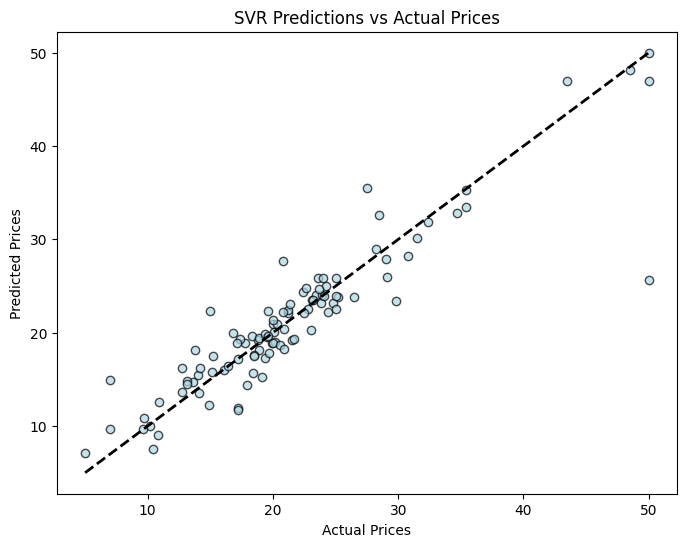

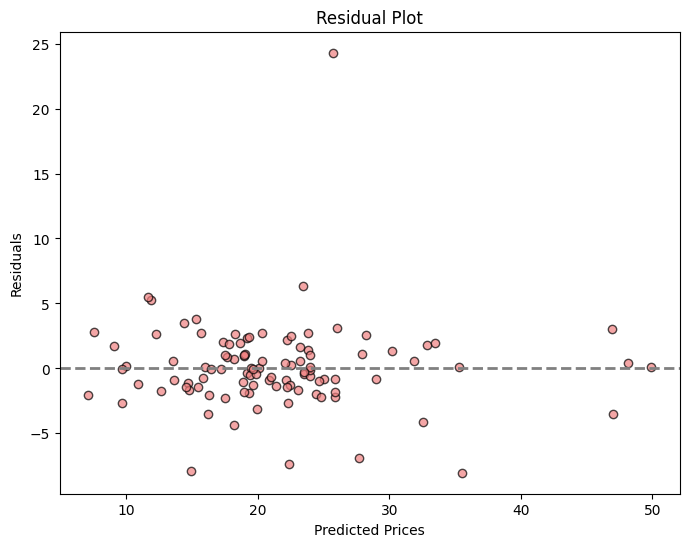

In [11]:
# Plot predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, edgecolor='k', color='lightblue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("SVR Predictions vs Actual Prices")
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, edgecolor='k', color='lightcoral', alpha=0.7)
plt.axhline(0, color='gray', linestyle='--', lw=2)
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
